<a href="https://colab.research.google.com/github/ghl051/ghl051/blob/main/House_Sales_in_King_County%2C_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Importing Data Sets

In [3]:
!pip install seaborn


In [5]:
!pip install requests

In [6]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
download(filepath, "housing.csv")
file_name = "housing.csv"

In [7]:
df = pd.read_csv(file_name)

In [8]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Wrangling

In [10]:
# Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Make sure the inplace parameter is set to True. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)

In [11]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [12]:
# We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [13]:
# We also replace the missing values of the column 'bathrooms' with the mean of the column 'bathrooms'  using the method replace(). Don't forget to set the  inplace  parameter top  True
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Exploratory Data Analysis

Question 3:

In [14]:
# Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a data frame. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.
floor_counts = df['floors'].value_counts().to_frame()

In [15]:
print(floor_counts)

     floors
1.0   10680
2.0    8241
1.5    1910
3.0     613
2.5     161
3.5       8


Question 4:

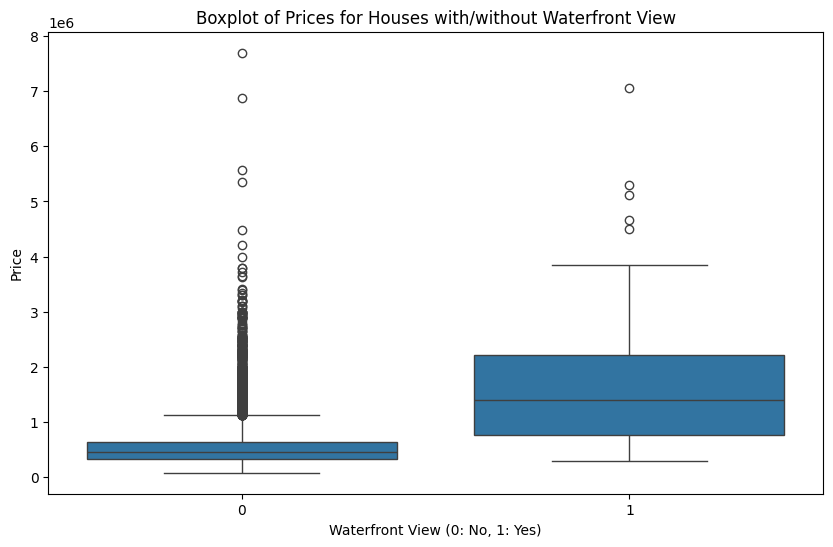

In [16]:
# Create a boxplot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Boxplot of Prices for Houses with/without Waterfront View')
plt.xlabel('Waterfront View (0: No, 1: Yes)')
plt.ylabel('Price')
plt.show()

Question 5: Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price. Take a screenshot of your code and scatterplot. You will need to submit the screenshot for the final project.

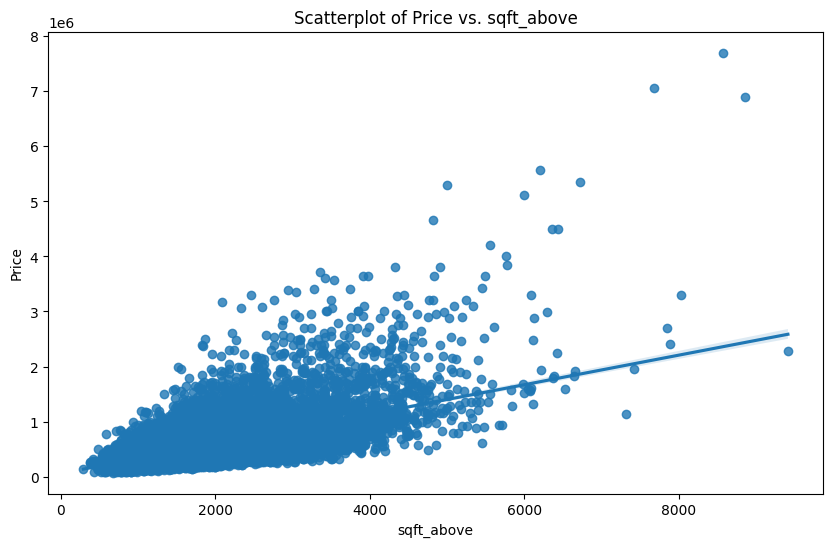

In [17]:
# Create a scatterplot using seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_above', y='price', data=df)
plt.title('Scatterplot of Price vs. sqft_above')
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.show()

In [18]:
# We can use the Pandas method corr() to find the feature other than price that is most correlated with price.
df.corr()['price'].sort_values()

<ipython-input-18-bcf6ca241c84>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# Model Development

In [19]:
# We can Fit a linear regression model using the longitude feature 'long' and caculate the R^2.
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

Question 6: Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming 'file_name' is the name of your CSV file
file_name = "housing.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_name)

# Select the features and target variable
X = df[['sqft_living']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

# Display the R^2 score
print(f'R^2 Score: {r2}')


R^2 Score: 0.49406905389089006


Question 7: Fit a linear regression model to predict the 'price' using the list of features:

In [22]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

In [23]:
# Then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.
print(f'R^2 Score: {r2}')

R^2 Score: 0.49406905389089006


Question 8
Create a list of tuples, the first element in the tuple contains the name of the estimator:

'scale'

'polynomial'

'model'

The second element in the tuple contains the model constructor

StandardScaler()

PolynomialFeatures(include_bias=False)

LinearRegression()

In [24]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

# Assuming 'file_name' is the name of your CSV file
file_name = "housing.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_name)

# Select the features and target variable
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors']

X = df[features]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a transformer for imputing missing values
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), features)
    ]
)

# Create a pipeline with imputation and a linear regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

# Display the R^2 score
print(f'R^2 Score: {r2}')


R^2 Score: 0.5092794138487851


# Model Evaluation and Refinement

In [28]:
# Import the necessary modules:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [29]:
# We will split the data into training and testing sets:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


Question 9: Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project

In [30]:
from sklearn.linear_model import Ridge

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# Assuming 'file_name' is the name of your CSV file
file_name = "housing.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_name)

# Select the features and target variable
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors']

X = df[features]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with imputation and Ridge regression
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('regressor', Ridge(alpha=0.1))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

# Display the R^2 score
print(f'R^2 Score for Ridge Regression: {r2}')


R^2 Score for Ridge Regression: 0.5092793990208399


Question 10: Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2. You will need to submit it for the final project.italicised text

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Assuming 'file_name' is the name of your CSV file
file_name = "housing.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_name)

# Select the features and target variable
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors']

X = df[features]
y = df['price']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with polynomial transformation and Ridge regression
degree = 2  # Second-order polynomial
alpha = 0.1  # Regularization parameter

pipeline = make_pipeline(
    PolynomialFeatures(degree),
    Ridge(alpha=alpha)
)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate the R^2 score
r2 = r2_score(y_test, y_pred)

# Display the R^2 score
print(f'R^2 Score for Polynomial Ridge Regression: {r2}')


R^2 Score for Polynomial Ridge Regression: 0.47301402878378784


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.15101e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
